In [28]:
import os
import re
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import axis

sys.path.append(os.path.abspath("../"))
from dataset import DS_DIMENSIONS, DS_NAMES
from utilities.figure_tools import (get_latest_results_directory, load_results,
                                    make_fig_directory)

index_results_path = "../results/final/vary_nrects_index.csv"
linear_results_path = "../results/final/vary_nrects_linear.csv"
output_dir = "./vary-nrects/"
export_figures = True
fig_type = ".pdf"

if export_figures and not os.path.isdir(output_dir):
    os.makedirs(output_dir)


In [29]:
index_results = pd.read_csv(index_results_path).groupby(["dataset", "explainer", "n_rects"]).mean().reset_index()
print("datasets", list(index_results["dataset"].unique()))
# all_results = index_results[index_results["n_rects"].isin([200, 300, 400, 500, 600, 700, 800, 900]) == False]
index_results.head()

datasets ['cancer', 'glass', 'magic', 'spambase', 'vertebral']


,dataset,explainer,n_rects,n_trees,max_depth,iteration,accuracy,precision,recall,f1,per_valid,avg_dist,avg_length,prep_time,explain_time,sample_time,n_explain
0,cancer,FACETIndex,100,100.0,NaN,4.5,0.955263,0.947611,0.926247,0.936365,1.0,0.476764,14.885,0.236598,0.047912,0.002396,20.0
1,cancer,FACETIndex,1000,100.0,NaN,4.5,0.955263,0.947611,0.926247,0.936365,1.0,0.408169,14.100,2.543509,0.189415,0.009471,20.0
2,cancer,FACETIndex,5000,100.0,NaN,4.5,0.955263,0.947611,0.926247,0.936365,1.0,0.372689,13.650,12.613572,0.735425,0.036771,20.0
3,cancer,FACETIndex,10000,100.0,NaN,4.5,0.955263,0.947611,0.926247,0.936365,1.0,0.354851,13.050,25.382134,1.331975,0.066599,20.0
4,cancer,FACETIndex,20000,100.0,NaN,4.5,0.955263,0.947611,0.926247,0.936365,1.0,0.343727,12.985,50.408335,2.457628,0.122881,20.0


In [30]:
linear_results = pd.read_csv(linear_results_path).groupby(["dataset", "explainer", "n_rects"]).mean().reset_index()
print("datasets", list(linear_results["dataset"].unique()))
# all_results = index_results[index_results["n_rects"].isin([200, 300, 400, 500, 600, 700, 800, 900]) == False]
linear_results.head()

datasets ['cancer', 'glass', 'magic', 'spambase', 'vertebral']


,dataset,explainer,n_rects,n_trees,max_depth,iteration,accuracy,precision,recall,f1,per_valid,avg_dist,avg_length,prep_time,explain_time,sample_time,n_explain
0,cancer,FACETIndex,100,100.0,NaN,4.5,0.955263,0.947611,0.926247,0.936365,1.0,0.476764,14.885,0.142560,0.027612,0.001381,20.0
1,cancer,FACETIndex,1000,100.0,NaN,4.5,0.955263,0.947611,0.926247,0.936365,1.0,0.408169,14.100,0.865085,0.211342,0.010567,20.0
2,cancer,FACETIndex,5000,100.0,NaN,4.5,0.955263,0.947611,0.926247,0.936365,1.0,0.372689,13.650,4.099295,1.020600,0.051030,20.0
3,cancer,FACETIndex,10000,100.0,NaN,4.5,0.955263,0.947611,0.926247,0.936365,1.0,0.354851,13.050,8.153496,2.015377,0.100769,20.0
4,cancer,FACETIndex,20000,100.0,NaN,4.5,0.955263,0.947611,0.926247,0.936365,1.0,0.343727,12.985,16.292307,3.992346,0.199617,20.0


In [31]:
cmap = plt.get_cmap("tab10")
colors = cmap.colors
ds_colors = {
    "cancer": colors[0],
    "glass": colors[1],
    "magic": colors[2],
    "spambase": colors[3],
    "vertebral": colors[4]
}
ds_markers = {
    "cancer": "^",
    "glass": "o",
    "magic": "v",
    "spambase": "s",
    "vertebral": "D"
}
marker_size = 12
line_width = 4
marker_sizes = {
    "cancer": marker_size,
    "glass": marker_size,
    "magic": marker_size,
    "spambase": marker_size,
    "vertebral": marker_size
}
nrects_pretty = {
    0: "0",
    100: "0.1",
    1000: "10",
    5000: "50",
    10000: "10",
    20000: "20",
    30000: "30",
    40000: "40",
    50000: "50",
    60000: "60",
    70000: "70",
    80000: "80",
    90000: "90",
    100000: "100",
}
line_x_ticks = [100_000]

In [32]:
def render_plot(xfeature, yfeature, xlabel, ylabel, title, save_name=None, xrange=None, yrange=None, xlog=False, ylog=False, lloc=None, loc="best", lhorz=False, results=index_results):

    fig = plt.figure(figsize=[10, 4.8], frameon=True)
    ax = fig.add_subplot(1, 1, 1)
    for ds in results["dataset"].unique():
        is_ds = results["dataset"] == ds
        for expl in results["explainer"].unique():
            is_expl = results["explainer"] == expl
            matching_rows = is_ds & is_expl
            ax.plot(results[matching_rows][xfeature], results[matching_rows][yfeature], label=ds, lw=line_width, marker=ds_markers[ds], ms=marker_sizes[ds], color=ds_colors[ds])
            xticks = list(range(0, 110_000, 10_000))
            ax.set_xticks(xticks,)
            # xticks = [_ for _ in range(len(index_results[matching_rows]["n_rects"]))]
            # ax.set_xticks(xticks,)
            xtick_labels = [nrects_pretty[_] for _ in xticks]
            ax.set_xticklabels(xtick_labels)

        # title and axis labels
        if title is not None:
            plt.title(title)
        plt.xlabel(xlabel,fontsize=30)
        plt.ylabel(ylabel,fontsize=30)
        # legend
        if lhorz:
            plt.legend(loc=loc, ncol=len(results["dataset"].unique()), bbox_to_anchor=(0, 1.22, 0.82, 0), handletextpad=0.5, columnspacing=1, handlelength=1.5, prop={"size":20})
        else:
            plt.legend(loc=loc)
        # x and y ranges
        if xrange is not None:
            plt.xlim(xrange)
        if yrange is not None:
            plt.ylim(yrange)
        # x and y scales
        if ylog:
            plt.yscale('log')
        if xlog:
            plt.xscale('log')
        plt.subplots_adjust(top=1.0)
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)


        if export_figures and save_name is not None:
            plt.savefig(output_dir + save_name + fig_type, bbox_inches="tight")

In [33]:
def render_bar(xfeature, yfeature, xlabel, ylabel, save_name=None, lloc=None, loc="best", lhorz=False, results=index_results):
    for ds in index_results["dataset"].unique():
        fig = plt.figure(figsize=[10, 4.8], frameon=True)
        ax = fig.add_subplot(1, 1, 1)
        index_match = (index_results["dataset"] == ds) & (index_results["explainer"] == "FACETIndex")
        linear_match = (linear_results["dataset"] == ds) & (linear_results["explainer"] == "FACETIndex")
        data1 = index_results[index_match][yfeature]
        data2 = linear_results[linear_match][yfeature]
        width =0.3
        ax.bar(np.arange(len(data1)), data1, width=width, )
        ax.bar(np.arange(len(data2))+ width, data2, width=width)
        xticks = [_ + width/2 for _ in range(len(linear_results[linear_match]["n_rects"]))]
        ax.set_xticks(xticks,)
        xtick_labels = [nrects_pretty[_] for _ in linear_results[linear_match]["n_rects"]]
        ax.set_xticklabels(xtick_labels)

        ax.legend(labels=["FACET COREX", "FACET Linear Scan"], prop={"size":20})
        plt.xlabel(xlabel, fontsize=30)
        plt.ylabel(ylabel, fontsize=30)
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)

        if export_figures and save_name is not None:
            plt.savefig(output_dir + save_name + "_{}".format(ds) + fig_type, bbox_inches="tight")

In [34]:
linear_match = (linear_results["dataset"] == "vertebral") & (linear_results["explainer"] == "FACETIndex")
# linear_results[linear_match]["n_rects"]
for _ in linear_results[linear_match]["n_rects"]: print(_)

100
1000
5000
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000


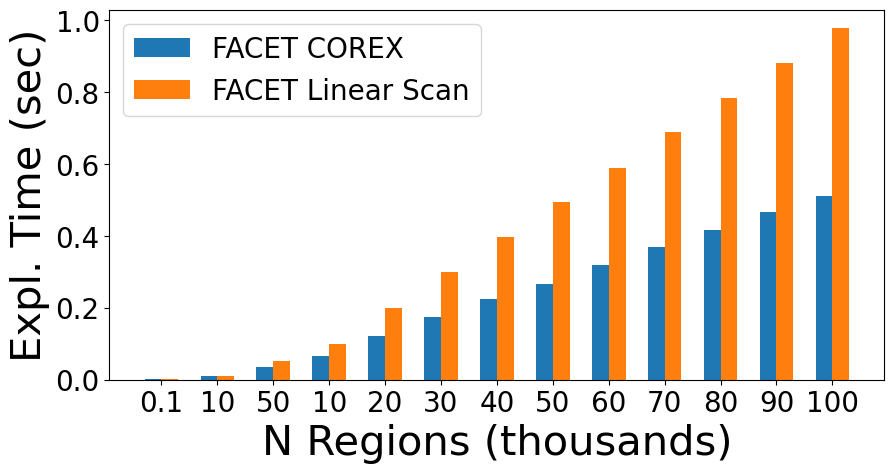

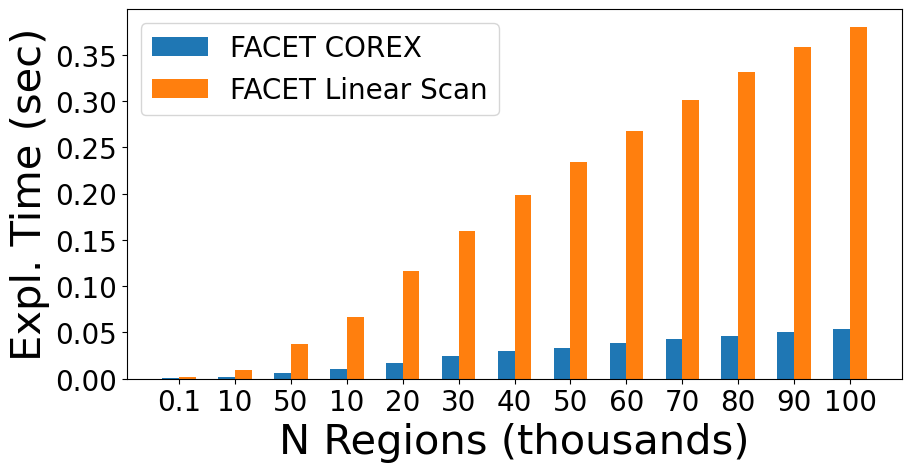

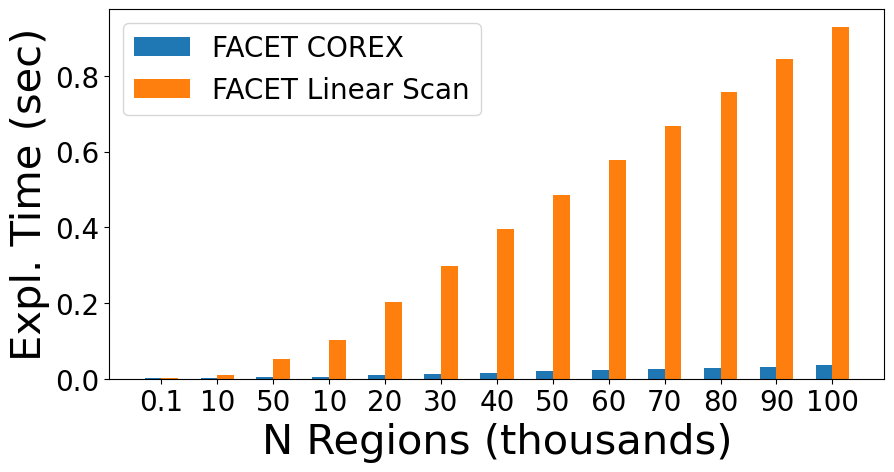

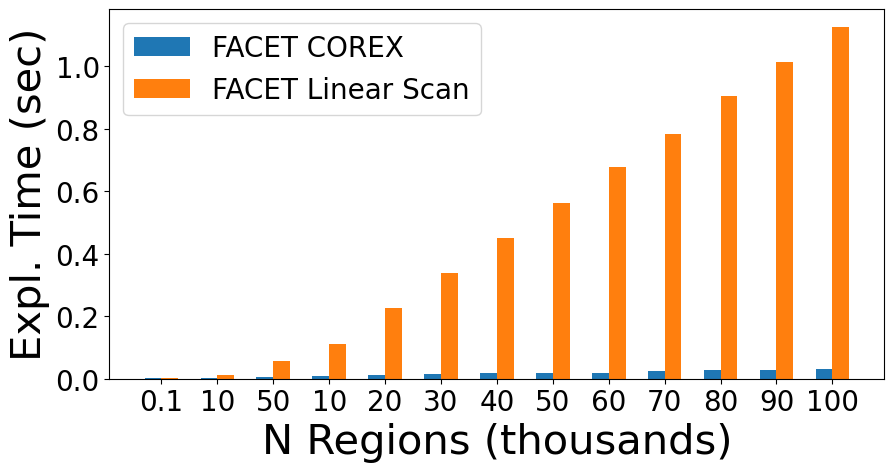

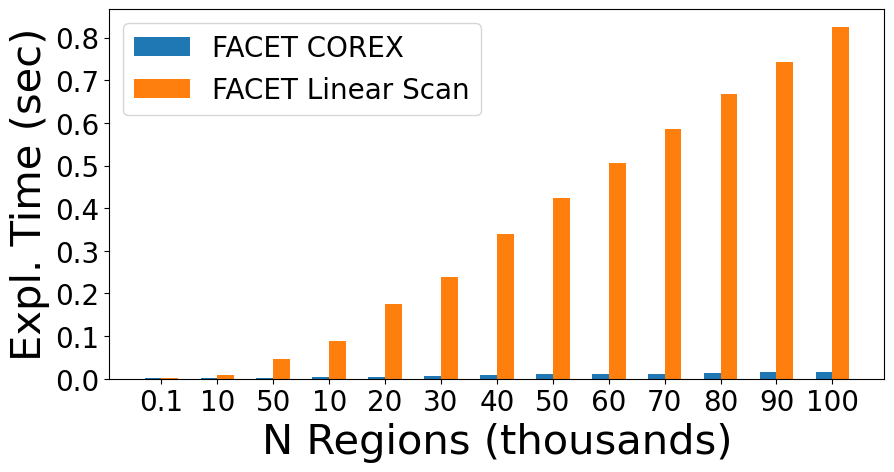

In [35]:
render_bar(xfeature="n_rects", yfeature="sample_time", xlabel="N Regions (thousands)", ylabel="Expl. Time (sec)", save_name="nrects_texplain_bar")

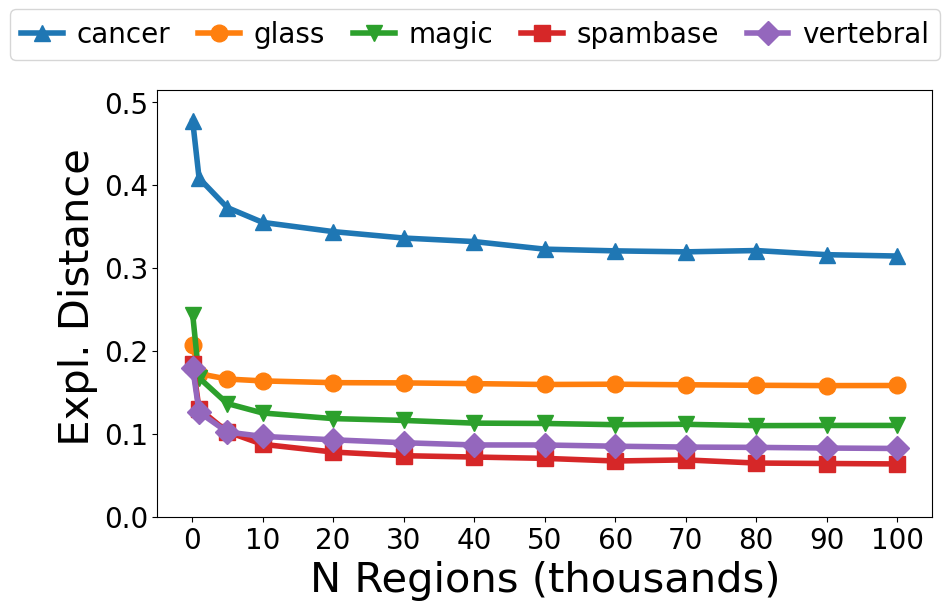

In [36]:
render_plot(xfeature="n_rects", yfeature="avg_dist", xlabel="N Regions (thousands)", ylabel=" Expl. Distance", title=None, save_name="nrects_dist", loc="upper center", lhorz=True, yrange=[0,0.515])

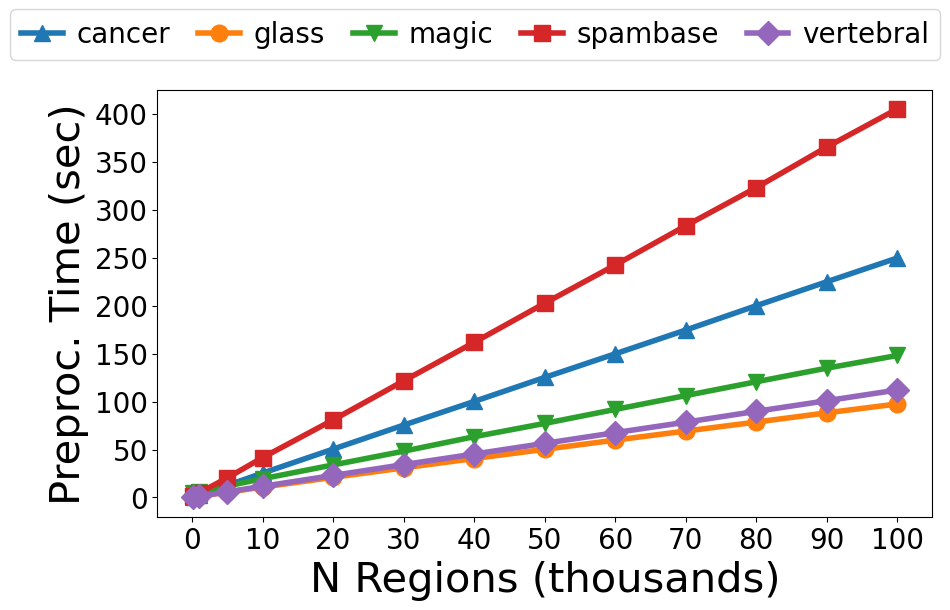

In [37]:
render_plot(xfeature="n_rects", yfeature="prep_time", xlabel="N Regions (thousands)", ylabel="Preproc. Time (sec)", title=None, save_name="nrects_tinit", loc="upper center", lhorz=True, yrange=None)

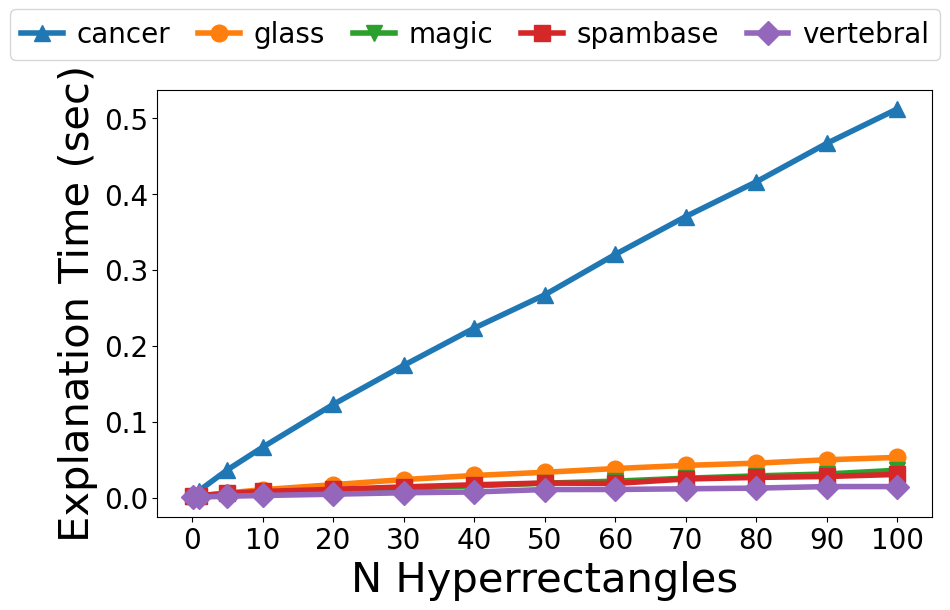

In [38]:
render_plot(xfeature="n_rects", yfeature="sample_time", xlabel="N Hyperrectangles", ylabel="Explanation Time (sec)", title=None, save_name="nrects_texplain", loc="upper center", lhorz=True)